# Classification

Classification machine learning model adalah model machine learning yang kita gunakan untuk memprediksi kategori.

Contohnya, kita misalkan punya data berat badan sebuah sample orang orang - dan kategori orang tersebut sehat / obesitas, kita bisa buat model yang menerima input berat badan, dan memprediksi output kategori sehat / obesitas.

Secara teknis, model machine learning hanya bisa menerima data tipe numerik, dan hasil prediksi juga selalu tipe numerik. Jadi, kita akan ubah semua data input jadi numerik, dan kita juga ubah output jadi numerik misalnya sehat - 0, obesitas - 1.

Kita akan pelajari:
- Logistic Regression
- K Nearest Neighbor (K-NN)

## Logistic Regression
Walaupun diberi nama regression, algoritma ini digunakan untuk masalah klasifikasi.

Algoritma logistic regression menggunakan formula sigmoid berbentuk `1 / (1 + e^-x)`

Namanya "regression" karena secara teknik dia sama dengan teknik Linear Regression dan Polynomial Regression.

Tapi, dia digunakan untuk masalah klasifikasi, karena hasil akhir yang diberikan formula ini cocok untuk memisahkan kategori.

In [ ]:
import matplotlib.pyplot as plt
import numpy as pd
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix

Sebagai studi kasus hari ini, kita gunakan data diabetes dari https://raw.githubusercontent.com/stefkwan-h8/dataset/main/diabetes.csv

In [ ]:
df_dia = pd.read_csv("https://raw.githubusercontent.com/stefkwan-h8/dataset/main/diabetes.csv")
df_dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df_dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


1. load data (survey, cari data, ...)
2. rapiin data (data cleaning, exploration, ...)
3. latih model
4. evaluasi model
5. tuning (ulang step 1-4 dan ubah2 untuk dapat model yang lebih baik)

In [ ]:
df_dia['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [ ]:
df_dia['Outcome'].unique()

array([1, 0], dtype=int64)

di dataset ini, kolom Outcome menunjukkan apakah seseorang sehat/ menderita diabetes.
   
   0 = sehat   
   1 = diabetes

model klasifikasi yang kita buat akan memprediksi apakah seseorang sehat/ diabetes. outputnya 0 atau 1.

kita juga pilih fitur (input) yang akan kita gunakan. misalnya, kita mencoba memprediksi seseorang sehat/ diabetes dari:
- glucose
- blood pressure
- insulin
- bmi
- DiabetesPedigreeFunction

artinya kita memberikan modelnya 5 input diatas, dan berekspektasi untuk bisa prediksi output 0/1 (dua kategori)

kalau kita gunakan teknik LogisticRegression, maka model yang kita buat kita import dari sklearn.linear_regression punya LogisticRegression

In [ ]:
# persiapkan fitur yang kita gunakan
X = df_dia[['Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction']]
X.head()

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction
0,148,72,0,33.6,0.627
1,85,66,0,26.6,0.351
2,183,64,0,23.3,0.672
3,89,66,94,28.1,0.167
4,137,40,168,43.1,2.288


In [ ]:
# persiapkan target
y = df_dia['Outcome']
y[:5]

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
# latih model
model_lr = LogisticRegression()
model_lr.fit(X, y)

LogisticRegression()

optional: sebelum latih model, kita bisa terapkan teknik data splitting yang sudah dipelajari. Pisahkan X dan y menjadi X_test y_test X_train y_train

optional: kita gunakan model untuk buat prediksi.

In [ ]:
X.loc[100]

Glucose                     163.000
BloodPressure                72.000
Insulin                       0.000
BMI                          39.000
DiabetesPedigreeFunction      1.222
Name: 100, dtype: float64

misalkan kita memiliki seseorang dengan Glucose 163, BloodPressure 72, Insulin 0, BMI 39, dan DiabetesPedigreeFunction 1.222

Apakah orang ini menderita diabetes atau tidak?

jawaban aslinya kita bisa lihat dari data awal kita

In [ ]:
y[100]

1

jawaban aslinya, dari dataset awal, orang ini menderita diabetes

berikut hasil prediksi model kita

In [ ]:
model_lr.predict([[163, 72, 0, 39, 1.222]])

c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

hasil prediksinya sama, prediksi kalau orang ini menderita diabetes

### Evaluasi model Classification
ada dua teknik umum untuk mengetes tingkat akurasi model classification:
1. confusion matrix
2. angka angka dari classification report

Confusion Matrix adalah matrix dimana:
- rows nya sesuai jumlah kategori yang ada dan menunjukkan data asli kita, masing masing kategori ada berapa.
- colums nya juga sesuai jumlah kategori yang ada dan menunjukkan data hasil prediksi model

secara visual, Confusion Matrix menunjukkan ada berapa prediksi yang tepat, sesuai data asli, di diagonalnya. Dan ada berapa yang salah prediksi yang di luar diagonalnya.

Classification Report akan memberikan kita angka-angka. Angka *precision*, *recall*, dan *f1-score* per kategori.



![image.png](attachment:image.png)

![image.png](attachment:image.png)

Untuk mengerti Precision dan Recall, kita perlu belajar terminologi "True Positive" "True Negative" "False Positive" dan "False Negative"

True Positive = orangnya diabetes, diprediksi diabetes

True Negative = orangnya TIDAK diabetes, diprediski TIDAK diabetes

False Positive = orangnya TIDAK diabetes, diprediksi diabetes

False Negative = orangenya diabetes, diprediksi TIDAK diabetes

dari keempat angka ini (yang bisa kita hitung totalnya dari confusion matrix), kita buatkan ratio.

TP / TP+FP (semua yang ditebak dengan benar dibagi semua jawaban benar ada berapa) adalah ratio precision. Precision menunjukkan jawaban benar kita seberapa akurat.

Recall dihitung dari TP / TP+FN (semua yang ditebak benar dibagi jawaban benar dan jawaban salah). Recall menunjukkan dari total semua yang di kategori tersebut, berapa persen yang berhasil ditebak dengan benar.

F1 Score adalah "rata rata" dari Precision dan Recall, tapi bukan cuma ditambah dan dibagi dua.

In [ ]:
# Evaluasi
# Confusion Matrix

cm = confusion_matrix(y, model_lr.predict(X))

cm

array([[449,  51],
       [121, 147]], dtype=int64)

optional: kita buatkan function untuk mem-visualisasi confusion matrix

In [ ]:
def drawConfusionMatrix(cm, n, title="Confusion Matrix"):
    fig, ax = plt.subplots(figsize=(n, n))
    ax.imshow(cm)
    ax.grid(False)

    ax.xaxis.set(ticks=range(n))
    ax.set_xlabel("Predicted")
    ax.yaxis.set(ticks=range(n))
    ax.set_ylabel("Actual")
    ax.set_title(title)

    ax.set_ylim(n-0.5, -0.5)
    for i in range(n):
        for j in range(n):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
    plt.show()

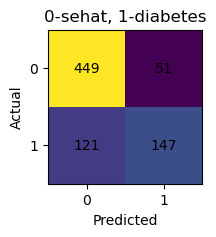

In [ ]:
drawConfusionMatrix(cm, 2, "0-sehat, 1-diabetes")

model kita berhasil memprediksi
- 449 orang sehat, diprediksi sehat
- 51 orang sehat, diprediksi menderita diabetes
- 121 penderita diabetes, diprediksi sehat
- 147 penderita diabetes, diprediksi menderita diabetes

bisa dibilang ada 449 + 147 hasil yang diprediksi dengan benar

449 TRUE negative, 147 TRUE positive, 51 False positive, 121 False negative (kalau dari sudut pandang diabetes itu hasil positif, jadi yang sehat kita bilang hasil negatif)

Kalau misalnya ada lebih dari 2 kategori, misalkan diabetes, obesitas, sehat... 2 1 0

maka dari sudut pandang diabetes itu hasil positif, yang hasilnya obesitas termasuk negatif. yang hasilnya sehat juga termasuk negatif.

Kita coba ambil contoh lain, misalnya model kita prediksi apakah bunga akan berwarna merah, biru, atau putih. kalau kita lagi fokus ke bunga merah, kita bilang positif adalah merah, maka yang hasil prediksi biru atau putih itu negatif.

Setiap kategori akan memiliki angka TP TN FP FN, Precision, Recall, F1-Score

angka angka ini bisa kita lihat menggunakan classification_report

In [ ]:
print(classification_report(y, model_lr.predict(X)) )

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.78       768
   macro avg       0.77      0.72      0.74       768
weighted avg       0.77      0.78      0.77       768



bisa dilihat untuk kategori 0, anggap yang sehat itu adalah hasil positif, maka precision 0.79 recall 0.90 dan f1-score 0.84

artinya, recall 0.9, 90% dari 500 data orang sehat, berhasil diprediksi dengan benar.

kita bisa berekspektasi kalau ada 1000 orang, data baru, maka hanya 90% yang akan diprediksi sehat. akan ada 10% yang TIDAK diprediksi sehat. ini artinya recall.

artinya, precision 0.79, 79% orang yang diprediksi sehat beneran sehat. Kita bisa berekspektasi kalau modelnya memberikan prediksi 1000 orang sehat, maka hanya 79% dari orang orang tersebut beneran sehat, sisanya adalah salah prediksi karena model tidak 100% precision.

### tuning
untuk model LogisticRegression kita bisa ubah ubah parameter solver dan C untuk mencoba membuat model yang lebih tinggi akurasinya.

perhatikan juga, tergantung situasi, kadang kita mau cari model yang precision/ recall di kategori tertentu lebih tinggi.

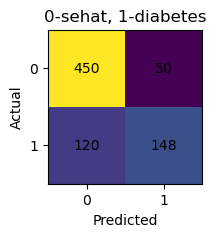

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.75      0.55      0.64       268

    accuracy                           0.78       768
   macro avg       0.77      0.73      0.74       768
weighted avg       0.77      0.78      0.77       768



In [ ]:
# train ulang model
model_lr2 = LogisticRegression(solver="liblinear", C=10, random_state=0)
model_lr2.fit(X, y)

# evaluasi
y_pred = model_lr2.predict(X)
drawConfusionMatrix(confusion_matrix(y, y_pred), 2, "0-sehat, 1-diabetes")
print(classification_report(y, y_pred))

khusus untuk LogisticRegression, kita bisa minta predict_proba, angka probabilitas datanya masuk ke kategori yang mana. model LogisiticRegression sebenarnya memberikan output angka dalam bentuk persentasi yang otomatis di konversi ke kategori.

Jadi misalakan kita prediksi orang A masuk kategori 0 atau 1? hasil modelnya akan bilang 0 atau 1, tapi kita bisa minta sebenarnya berapa probabilitasnya, berapa % ke 0 dan berapa % ke 1

Contoh, orang ke 100 yang menderita diabetes tadi, sebenarnya model kita seberapa yakin dia diabetes?

In [ ]:
model_lr.predict_proba([[163, 72, 0, 39, 1.222]])

c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.10904611, 0.89095389]])

model kita bilang probabilitas orang ini masuk kategori 0 (sehat) adalah 10.9% sedangkan sisanya 89.1% orang ini kemungkinan menderita diabetes (kategori 1)

## K-Nearest Neighbor

menggunakan cara yang sama sekali berbeda, KNN atau K Nearest Neighbor akan:
- plot semua data ke graph
- setiap data ada kategorinya

tergantung jumlah K, maka model akan memprediksi sebuah data masuk kategori mana, tergantung dari hasil voting K tetangga terdekat data tersebut paling banyak kategori mana.

Misalkan K nya 10, dan sebuah data baru mau di prediksi kategori apa, kita cari 10 tetangga terdekatnya, lalu dari 10 tetangga itu, paling banyak kategori apa. data terbaru ini akan di prediksi sesuai kategori terbanyak.

Misalkan data baru A, di sebuah model KNN yang K=3, memiliki 3 tetangga terdekat, 2 obesitas 1 sehat, maka A akan diprediksi masuk kategori obesitas.

In [ ]:
# buat model
model_knn = KNeighborsClassifier()
model_knn.fit(X, y)

KNeighborsClassifier()

In [ ]:
# prediksi output orang ke 100
X.loc[100]

Glucose                     163.000
BloodPressure                72.000
Insulin                       0.000
BMI                          39.000
DiabetesPedigreeFunction      1.222
Name: 100, dtype: float64

In [ ]:
model_knn.predict([[163, 72, 0, 39, 1.222]])

c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

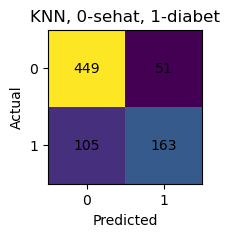

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       500
           1       0.76      0.61      0.68       268

    accuracy                           0.80       768
   macro avg       0.79      0.75      0.76       768
weighted avg       0.79      0.80      0.79       768



In [ ]:
# evaluasi model
y_pred = model_knn.predict(X)
drawConfusionMatrix(confusion_matrix(y, y_pred), 2, "KNN, 0-sehat, 1-diabet")
print(classification_report(y, y_pred))

prediksi 1 org [1]


c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


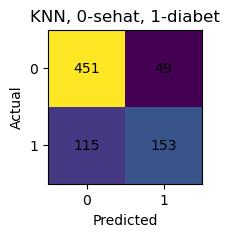

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       500
           1       0.76      0.57      0.65       268

    accuracy                           0.79       768
   macro avg       0.78      0.74      0.75       768
weighted avg       0.78      0.79      0.78       768



In [ ]:
# tuning

# latih model
# kalau jumlah n_neighbors tidak diisi, defaultnya adalah 5
# kita bisa ubah2 jumlah n_neighbors untuk cari model KNN terbaik
model_knn = KNeighborsClassifier(n_neighbors=13)
model_knn.fit(X, y)

# pakai untuk prediksi
print("prediksi 1 org", model_knn.predict([[163, 72, 0, 39, 1.222]]))

# evaluasi model
y_pred = model_knn.predict(X)
drawConfusionMatrix(confusion_matrix(y, y_pred), 2, "KNN, 0-sehat, 1-diabet")
print(classification_report(y, y_pred))


In [ ]:
model_knn.score(X, y)

0.7864583333333334

untuk algoritma yang ada "K" nya kita bisa bikin plot, untuk setiap K, error atau akurasinya berapa. setelah itu kita pilih jumlah K yang paling oke

misalnya, kita coba plot accuracy per jumlah K dari K=1 sampai K=100 untuk model kita diatas

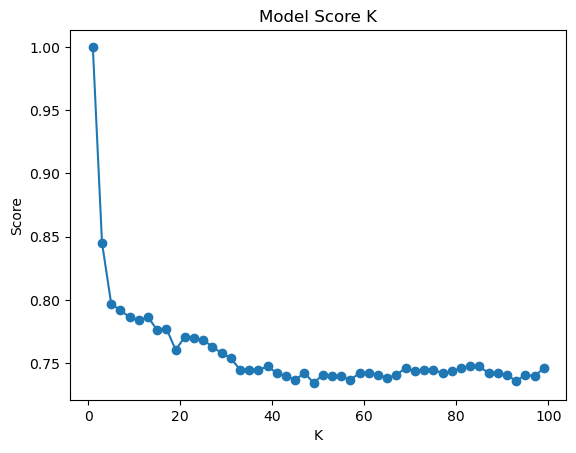

In [ ]:
k_list = range(1, 100, 2)
score_list = []

for k in k_list:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X, y)

    score_list.append(model_knn.score(X, y))

plt.plot(k_list, score_list, marker='o')
plt.xlabel("K")
plt.ylabel("Score")
plt.title("Model Score K")
plt.show()

sebenarnya, karena kita tidak split data jadi train dan test data, ada keanehan seperti tingkat akurasi 100% saat K=1 yang terjadi.

- membuat model klasifikasi dengan data yang kategori lebih dari 2
- encoding - mengkonversi data non numerik menjadi numerik
- menambahkan data splitting sebelum membuat model klasifikasi

contoh data yang bisa digunakan untuk latihan klasifikasi adalah https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html dari sklearn yang aslinya diambil dari website archibe.ics.uci.edu

di dataset ini, ada 3 kategori wine. fitur fiturnya banyak dan sudah numerik. targetnya ada 3 kategori dan sudah numerik.

di contoh kali ini, kita coba gunakan data marketing campaign dari https://raw.githubusercontent.com/stefkwan-h8/dataset/main/marketing_campaign.csv

In [ ]:
df_marketing = pd.read_csv("https://raw.githubusercontent.com/stefkwan-h8/dataset/main/marketing_campaign.csv", sep="\t")
df_marketing.head()

# untuk file csv yang pemisah nya bukan "," kita bisa tambahkan parameter sep="pemisahnya" misalnya ";" atau "\t" di file ini

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
# hapus missing values
df_marketing = df_marketing.dropna()

Misalnya kita mau buat model untuk memprediksi Marital_Status seseorang tergantung dari fitur:
- Year_Birth
- Education
- Income

jadi ada 3 fitur, dan 1 target.

3 fitur ada 2 Year_Birth Income yang sudah numerik, dan 1 Education yang perlu kita ubah dari text menjadi numerik

targetnya Marital_Status juga perlu kita ubah dari text menjadi numerik

In [ ]:
# siapin data
X = df_marketing[['Year_Birth', 'Education', 'Income']]
y = df_marketing['Marital_Status']

X.head()

,Year_Birth,Education,Income
0,1957,Graduation,58138.0
1,1954,Graduation,46344.0
2,1965,Graduation,71613.0
3,1984,Graduation,26646.0
4,1981,PhD,58293.0


In [ ]:
y[:5]

0      Single
1      Single
2    Together
3    Together
4     Married
Name: Marital_Status, dtype: object

## Encoding
konversi text jadi angka

In [ ]:
le = LabelEncoder()
le.fit(df_marketing['Education'])

education_encoded = le.transform(df_marketing['Education'])
education_encoded

array([2, 2, 2, ..., 2, 3, 4])

In [ ]:
df_marketing['Education']

0       Graduation
1       Graduation
2       Graduation
3       Graduation
4              PhD
           ...    
2235    Graduation
2236           PhD
2237    Graduation
2238        Master
2239           PhD
Name: Education, Length: 2216, dtype: object

In [ ]:
le.classes_

array(['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'], dtype=object)

label encoder ini mengubah value "2n Cycle" dari kolom Education menjadi angka 0, Basic menjadi 1, Graduation 2, Master 3, PhD 4

yang tadinya data text telah menjadi data numerik, duanya2 tetap kategorikal data

In [ ]:
# siapin data
X = df_marketing[['Year_Birth', 'Education', 'Income']]
X['Education'] = education_encoded

X.head()

C:\Users\user\AppData\Local\Temp\ipykernel_12584\1761905311.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Education'] = education_encoded


,Year_Birth,Education,Income
0,1957,2,58138.0
1,1954,2,46344.0
2,1965,2,71613.0
3,1984,2,26646.0
4,1981,4,58293.0


In [ ]:
# targetnya juga kita encoding
y = df_marketing['Marital_Status']

le = LabelEncoder()
le.fit(y)
print(le.classes_)

y_encoded = le.transform(y)
y_encoded

['Absurd' 'Alone' 'Divorced' 'Married' 'Single' 'Together' 'Widow' 'YOLO']


array([4, 4, 5, ..., 2, 5, 3])

In [ ]:
df_marketing['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

karena jumlah kategori Alone, Absurd, YOLO sangat kecil, baiknya kita drop ketiga kategori ini

In [ ]:
y = y_encoded

ada 8 kategori target, dari Absurd sampai YOLO. Absurd 0, Alone 1, Divorced 2, Married 3, Single 4, Together 5, Widow 6, YOLO 7.

## Data Splitting

kita split data jadi train dan test data sebelum membuat model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()
print(len(X_train), len(X_test))

1662 554


## Build Model

kita coba gunakan Logistic Regression dan KNN untuk membuat model prediksi status menikah ini, dan kita lihat mana yang lebih akurat

In [ ]:
model_lr_ms = LogisticRegression()
model_lr_ms.fit(X_train, y_train)

c:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model_knn_ms = KNeighborsClassifier()
model_knn_ms.fit(X_train, y_train)

KNeighborsClassifier()

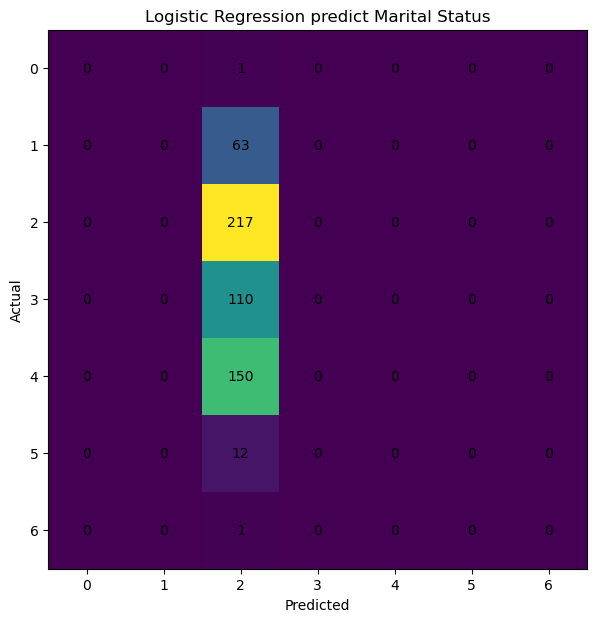

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00        63
           3       0.39      1.00      0.56       217
           4       0.00      0.00      0.00       110
           5       0.00      0.00      0.00       150
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00         1

    accuracy                           0.39       554
   macro avg       0.06      0.14      0.08       554
weighted avg       0.15      0.39      0.22       554



c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# evaluasi kedua model menggunakan Confusion Matrix dan classification report
y_pred = model_lr_ms.predict(X_test)
drawConfusionMatrix(confusion_matrix(y_test, y_pred), 7, "Logistic Regression predict Marital Status")
print(classification_report(y_test, y_pred))

model ini selalu memprediksi marital status "3" atau "Married"

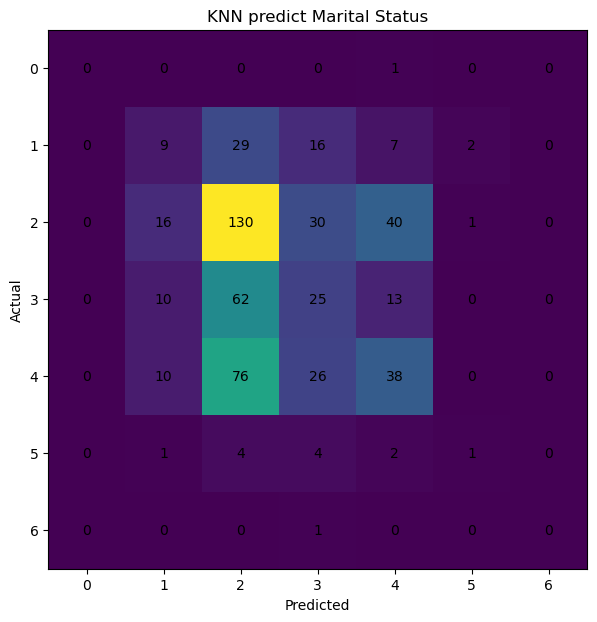

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.20      0.14      0.17        63
           3       0.43      0.60      0.50       217
           4       0.25      0.23      0.24       110
           5       0.38      0.25      0.30       150
           6       0.25      0.08      0.12        12
           7       0.00      0.00      0.00         1

    accuracy                           0.37       554
   macro avg       0.21      0.19      0.19       554
weighted avg       0.35      0.37      0.35       554



c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred = model_knn_ms.predict(X_test)
drawConfusionMatrix(confusion_matrix(y_test, y_pred), 7, "KNN predict Marital Status")
print(classification_report(y_test, y_pred))

model KNN jauh lebih baik, tapi tetap memiliki akurasi yang rendah dan juga condong prediksi status "3" atau "Married"

biasanya model yang selalu condong prediksi kategori tertentu, itu karena data training nya berat di kategori tersebut. misalnya dari 1000 data, ada 700 yang status married, 100 yang single, sisnya 5 kategori lain, mau tidak mau model akan condong prediksi semua orang married.